# Phase diagram exploration

Here, N refers to x1n, and P to x1p.

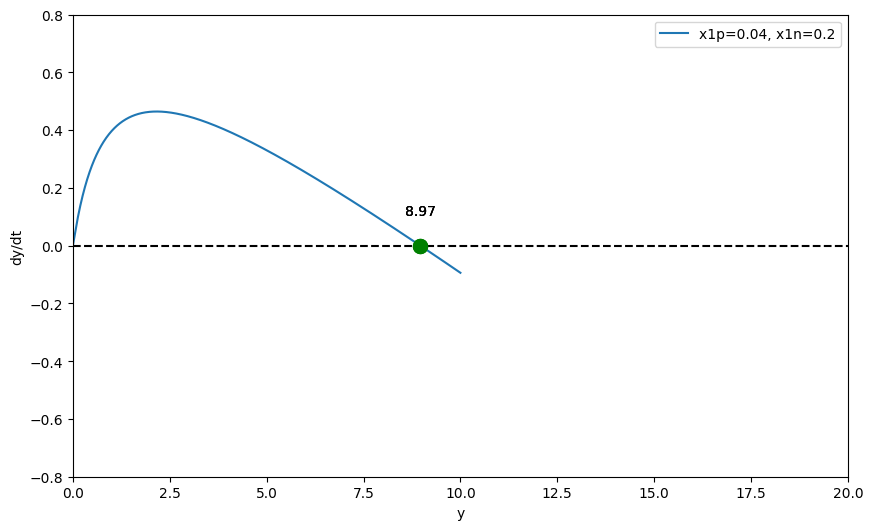

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import root_scalar
import ipywidgets as widgets
from IPython.display import display, clear_output

delta = 0.1
k_s = 0.02
b = 0.005  # Assuming 'b' is a constant; adjust as needed

def dy_dt(y, delta, x1p, x1n, k_s):
    return y / (1 + y) - delta * y + 0.017 * x1p - (y * 0.017 * (b + x1n)) / (k_s + y)

def d_dy_dt(y, delta, x1p, x1n, k_s):
    return (1 + k_s) / (1 + y) ** 2 - delta - (b + x1n) * k_s / (k_s + y) ** 2

y_values = np.linspace(0, 10, 1000)

# Initial values
x1p_initial = 0.04
x1n_initial = 0.2  # N_initial replaced with x1n_initial

# Function to find and analyze fixed points
def analyze_fixed_points(ax, delta, x1p, x1n, k_s, y_values):
    dy_dt_values = dy_dt(y_values, delta, x1p, x1n, k_s)
    ax.clear()
    ax.plot(y_values, dy_dt_values, label=f'x1p={x1p:.2f}, x1n={x1n:.1f}')
    ax.axhline(y=0, color='k', linestyle='--')

    # Find fixed points
    fixed_points = []
    for y_guess in [0.1, 1, 5, 10]:  # Try different initial guesses
        try:
            result = root_scalar(lambda y: dy_dt(y, delta, x1p, x1n, k_s), x0=y_guess, method='secant')
            if result.converged and result.root > 0 and result.root < 10:
                fixed_points.append(result.root)
        except:
            pass

    fixed_points = sorted(set(fixed_points))  # Remove duplicates and sort

    for fp in fixed_points:
        stability = d_dy_dt(fp, delta, x1p, x1n, k_s)
        if stability < 0:
            marker = 'go'
            label = ''
        elif stability > 0:
            marker = 'ro'
            label = ''
        else:
            marker = 'bo'
            label = ''

        ax.plot(fp, 0, marker, markersize=10)
        ax.annotate(f'{fp:.2f}\n{label}', (fp, 0), textcoords="offset points", xytext=(0,10), ha='center')

    ax.set_xlim(0, 20)
    ax.set_ylim(-0.8, 0.8)
    ax.set_xlabel('y')
    ax.set_ylabel('dy/dt')
    ax.legend()

# Create sliders
x1p_slider = widgets.FloatSlider(value=x1p_initial, min=0.0, max=5, step=0.01, description='x1p:')
x1n_slider = widgets.FloatSlider(value=x1n_initial, min=0.0, max=5, step=0.01, description='N:')

# Create figure and single axis
fig, ax = plt.subplots(figsize=(10, 6))

# Initial plot
analyze_fixed_points(ax, delta, x1p_initial, x1n_initial, k_s, y_values)

# Update function
def update(x1p, x1n):
    analyze_fixed_points(ax, delta, x1p, x1n, k_s, y_values)
    with output_widget:
        clear_output(wait=True)
        display(fig)

# Create output widget
output_widget = widgets.Output()

# Link sliders to update function
widgets.interactive_output(update, {'x1p': x1p_slider, 'x1n': x1n_slider})

# Display the plot and sliders
display(widgets.VBox([widgets.HBox([x1p_slider, x1n_slider]), output_widget]))
with output_widget:
    display(fig)



In [3]:
# Display the plot and sliders
display(widgets.VBox([widgets.HBox([x1p_slider, x1n_slider]), output_widget]))
with output_widget:
    display(fig)


Calcul des points fixes:   0%|          | 0/40000 [00:00<?, ?it/s]

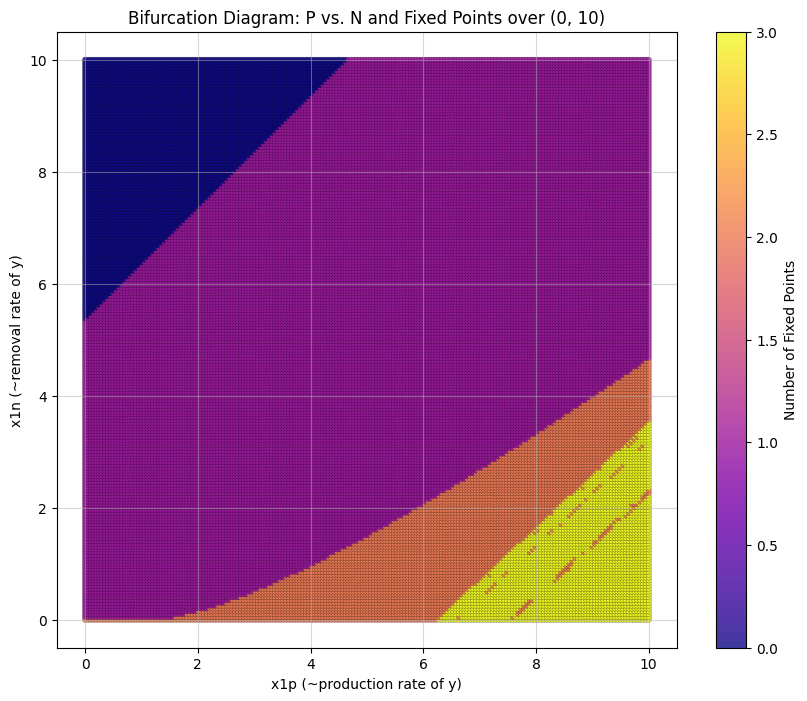

In [5]:
import numpy as np
from tqdm.notebook import tqdm  # Use tqdm.notebook for better progress bar in Jupyter
from itertools import product
from scipy.optimize import root_scalar

# Paramètres
delta = 0.1  # Example value for delta, adjust as necessary
k_s = 0.02  # Example value for k_s, adjust as necessary
x1p_values = np.linspace(0, 10, 200)
x1n_values = np.linspace(0, 10, 200)
bifurcation_lines = []
y_max = 10
y_min = 0

# Define the dy_dt function (you need to adapt this as per your actual definition)
def dy_dt(y, delta, x1p, x1n, k_s):
    b = 0.005  # Example constant
    return y / (1 + y) - delta * y + 0.017 * x1p - (y * 0.017 * (b + x1n)) / (k_s + y)

# Boucle avec barre de progression
for x1p, x1n in tqdm(product(x1p_values, x1n_values), total=len(x1p_values)*len(x1n_values), desc="Calcul des points fixes"):
    fixed_points = []
    for y_guess in [y_min, 1, 5, y_max]:
        try:
            result = root_scalar(dy_dt, args=(delta, x1p, x1n, k_s), method='secant', x0=y_guess)
            if result.converged and 0 <= result.root <= 10:
                fixed_points.append(round(result.root, 5))
        except:
            continue
    fixed_points = sorted(set(fixed_points))
    bifurcation_lines.append((x1p, x1n, len(fixed_points)))

# Convert bifurcation data to array for easier plotting
bifurcation_lines = np.array(bifurcation_lines)
x1p_plot = bifurcation_lines[:, 0]  # P_plot replaced with x1p_plot
x1n_plot = bifurcation_lines[:, 1]  # N_plot replaced with x1n_plot
fp_count = bifurcation_lines[:, 2]

# Plot bifurcation diagram
plt.figure(figsize=(10, 8))
scatter = plt.scatter(x1n_plot, x1p_plot, c=fp_count, cmap='plasma', s=15, alpha=0.8, edgecolors='k', linewidth=0.2)  # N_plot, P_plot replaced with x1n_plot, x1p_plot
cbar = plt.colorbar(scatter, label="Number of Fixed Points")
plt.xlabel("x1p (~production rate of y)")  # Updated x-axis label to reflect x1p (assuming it's the production rate)
plt.ylabel("x1n (~removal rate of y)")   # Updated y-axis label to reflect x1n (assuming it's the removal rate)
plt.title(f"Bifurcation Diagram: P vs. N and Fixed Points over {y_min,y_max}")  # Kept original title but with x1p and x1n in expressions
plt.grid(alpha=0.5)

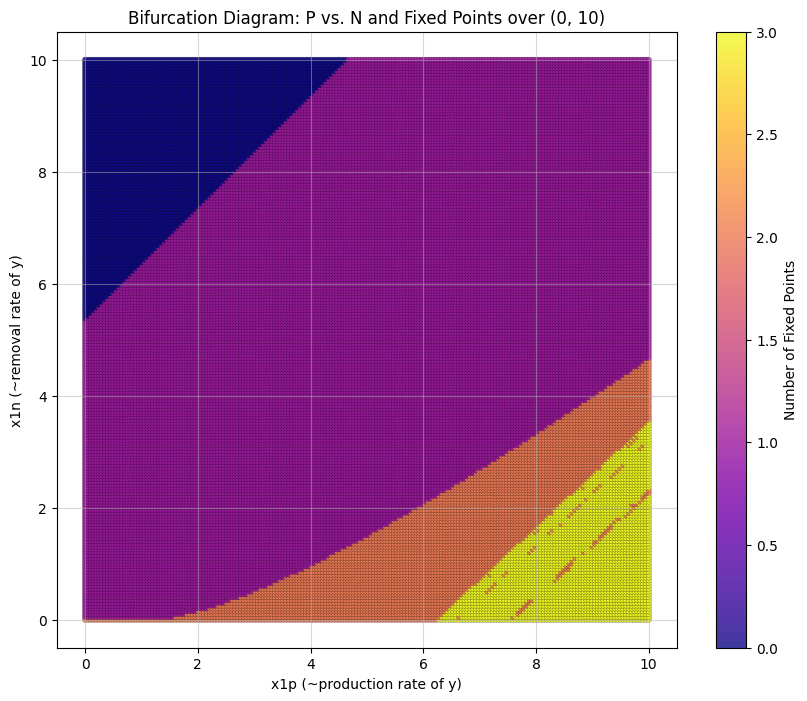

In [ ]:
# Convert bifurcation data to array for easier plotting
bifurcation_lines = np.array(bifurcation_lines)
x1p_plot = bifurcation_lines[:, 0]  # P_plot replaced with x1p_plot
x1n_plot = bifurcation_lines[:, 1]  # N_plot replaced with x1n_plot
fp_count = bifurcation_lines[:, 2]

# Plot bifurcation diagram
plt.figure(figsize=(10, 8))
scatter = plt.scatter(x1n_plot, x1p_plot, c=fp_count, cmap='plasma', s=15, alpha=0.8, edgecolors='k', linewidth=0.2)  # N_plot, P_plot replaced with x1n_plot, x1p_plot
cbar = plt.colorbar(scatter, label="Number of Fixed Points")
plt.xlabel("x1p (~production rate of y)")  # Updated x-axis label to reflect x1p (assuming it's the production rate)
plt.ylabel("x1n (~removal rate of y)")   # Updated y-axis label to reflect x1n (assuming it's the removal rate)
plt.title(f"Bifurcation Diagram: P vs. N and Fixed Points over {y_min,y_max}")  # Kept original title but with x1p and x1n in expressions
plt.grid(alpha=0.5)


In [ ]:
# Add labels manually using given coordinates
labels = [
    {"text": "monostable ON phase ", "xy": (0.75, 0.75), "xytext": (0.75,0.80)},  # Example point
    {"text": "monostable OFF phases", "xy": (0.8,0.2), "xytext": (0.8,0.3)},  # Example point
    {"text": "bistable switch", "xy": (0.6,0.2), "xytext": (0.75,0.5)},  # Example point
]

for label in labels:
    plt.annotate(
        label["text"],
        xy=label["xy"],
        xytext=label["xytext"],
        arrowprops=dict(arrowstyle="->", color='red'),
        fontsize=10,
        color='red'
    )

plt.show()

3 saddle points means a bistability (switch ON/OFF, yellow strip), ie α can either be green or grey (an unstable fp is always followed by a stable one). In such functionning, the activation of the neuron is only given by the initial value of y=alpha/K. For one FP, the neuron either have an OFF state (upper purple strip) or an ON state (lower purple strip)

As we initially start from low concentrations of P and N, in the 3 fp configuration, the system will choose the off phase, while in the 1 fp config, the system will either be on or off, depending on either we crossed the bifurcation point or not.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp


# Define symbols and parameters
y, p = sp.symbols('y p')

# Choose fixed parameters (adjust as necessary)
k = 0.02
delta =0.1
n_val = 0.25

# Define the function f such that f(y) = 0
f = (k + y)*y - delta*y*(1 + y)*(k + y) + p*(1 + y)*(k + y) - n_val*y*(1 + y)

# Define a range for p (adjust the endpoints and step as necessary)
p_vals = np.linspace(-2, 10, 400)
p_plot = []
y_plot = []

# Loop over each value of p, substitute in f, and solve for y
for p_val in p_vals:
    # Substitute the current p value into f to get an expression solely in y
    f_sub = f.subs(p, p_val)

    # Solve the resulting equation f_sub = 0 for y using numerical roots
    try:
        roots = sp.nroots(f_sub)
    except sp.NoConvergence:
        print(f"No convergence for p = {p_val}")
        continue

    # Iterate over the computed roots and collect all real roots
    for r in roots:
        if abs(sp.im(r)) < 1e-6:  # Checks for real numbers
            y_real = float(sp.re(r))
            p_plot.append(p_val)
            y_plot.append(y_real)






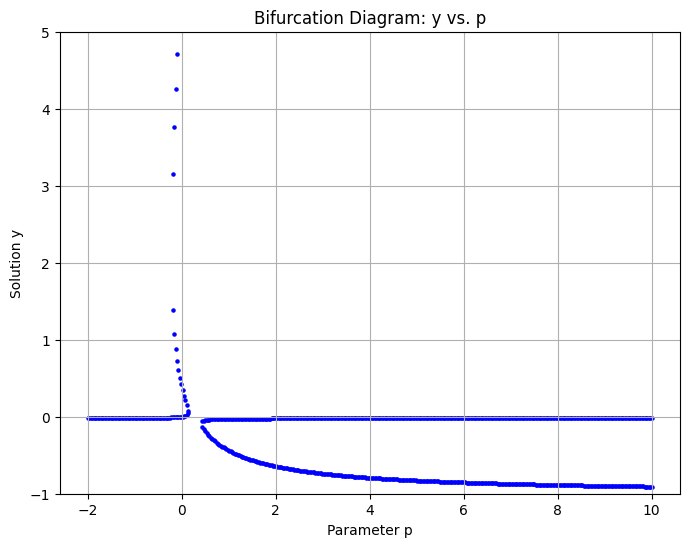

In [ ]:
# Plot the bifurcation diagram
plt.figure(figsize=(8, 6))
plt.scatter(p_plot, y_plot, s=5, color='blue')
plt.xlabel("Parameter p")
plt.ylabel("Solution y")
plt.title("Bifurcation Diagram: y vs. p")
plt.grid(True)

# Set the y-axis range so that it stops at 10
plt.ylim(-1, 5)  # Adjust min(y_plot) as appropriate if needed

plt.show()

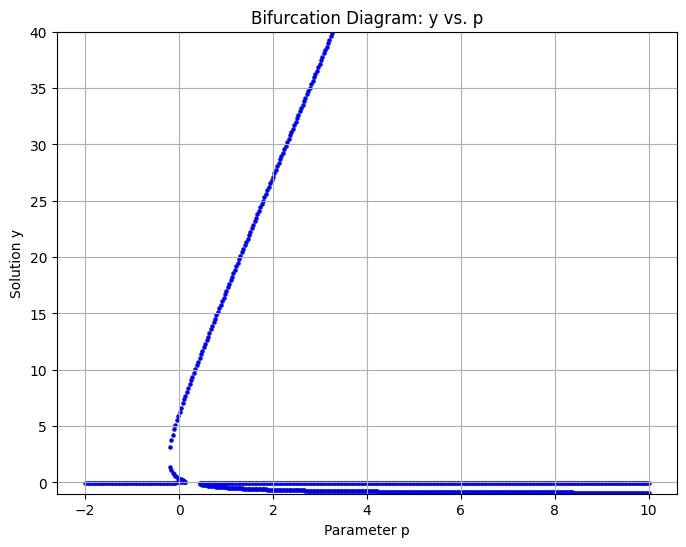

In [ ]:
# Plot the bifurcation diagram
plt.figure(figsize=(8, 6))
plt.scatter(p_plot, y_plot, s=5, color='blue')
plt.xlabel("Parameter p")
plt.ylabel("Solution y")
plt.title("Bifurcation Diagram: y vs. p")
plt.grid(True)

# Set the y-axis range so that it stops at 10
plt.ylim(-1, 40)  # Adjust min(y_plot) as appropriate if needed

plt.show()

So there are 2 stationnary solutions, as a function of the value p, and y initial concentration. 1 root leads to not alpha production whatever the value of p is, while the second leads to alpha production for p increasing (remember that n is a given concentration). The negative alpha branches keep decreasing while being negaive, then is discarded.

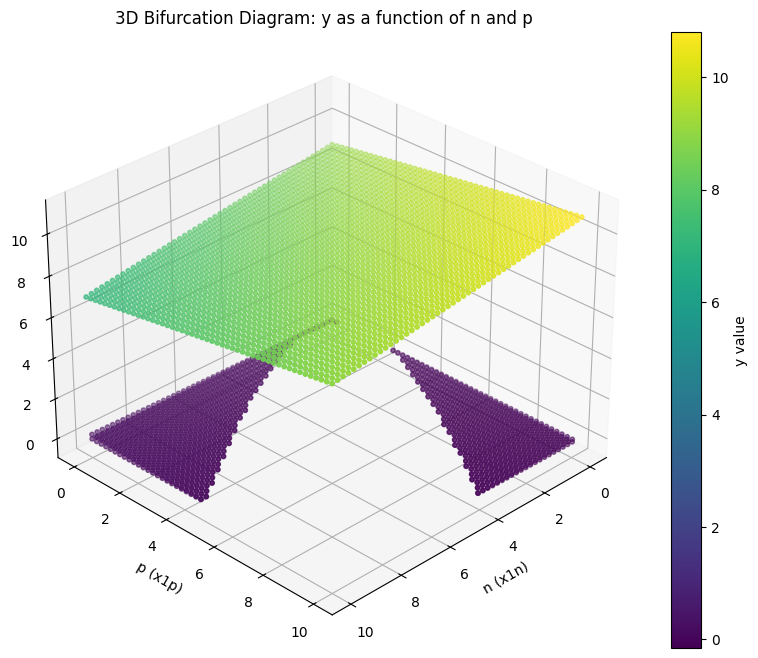

In [ ]:
# Uncomment one of the following lines if you're using a Jupyter Notebook:
# %matplotlib notebook
# %matplotlib widget

import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
from mpl_toolkits.mplot3d import Axes3D  # Necessary for 3d plotting

# Define the symbols:
y, x1p, x1n = sp.symbols('y x1p x1n')

# Given constant parameter values
ks = 0.02
b  = 0.005
delta = 0.1

# Define the steady state equation:
# f(y) = y*(ks+y) - (1+y)*(ks+y)*delta*y + (1+y)*(ks+y)*0.017*x1p - y*(1+y)*(b+0.017*x1n)
f = y*(ks + y) - (1 + y)*(ks + y)*delta*y + (1 + y)*(ks + y)*0.017*x1p - y*(1 + y)*(b + 0.017*x1n)

# Define a range for n and p.
# Adjust these ranges as needed.
n_vals = np.linspace(0, 10, 50)  # for x1n, here thought of as 'n'
p_vals = np.linspace(0, 10, 50)  # for x1p, here thought of as 'p'

# Prepare lists to store the computed points
n_plot = []
p_plot = []
y_plot = []

# Loop over all combinations of n and p, solve for y in f(y)=0
for n_val in n_vals:
    for p_val in p_vals:
        # Substitute the current values of p and n into f:
        f_sub = f.subs({x1p: p_val, x1n: n_val})

        try:
            # Solve f_sub=0 for y numerically:
            roots = sp.nroots(f_sub)
        except sp.NoConvergence:
            print(f"No convergence for n = {n_val}, p = {p_val}")
            continue

        # Record real roots
        for r in roots:
            if abs(sp.im(r)) < 1e-6:  # check if r is essentially real
                y_val = float(sp.re(r))
                n_plot.append(n_val)
                p_plot.append(p_val)
                y_plot.append(y_val)

# Create an interactive 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(n_plot, p_plot, y_plot, c=y_plot, cmap='viridis', s=10)

# Set axis labels and title
ax.set_xlabel("n (x1n)")
ax.set_ylabel("p (x1p)")
ax.set_zlabel("Steady state y")
ax.set_title("3D Bifurcation Diagram: y as a function of n and p")

# Set initial view angle: change elevation and azimuth as desired
ax.view_init(elev=30, azim=45)

# Optionally restrict z-axis (y values) from below to 10 if needed:
# ax.set_zlim(min(y_plot), 10)

# Add a color bar for reference
plt.colorbar(sc, label="y value")

# Show the interactive plot
plt.show()


